Length of L1 = 
4


C:\Users\swako\AppData\Local\Temp\ipykernel_27972\1729919716.py:112: ComplexWarning: Casting complex values to real discards the imaginary part
  P1col[ii] = P1
C:\Users\swako\AppData\Local\Temp\ipykernel_27972\1729919716.py:115: ComplexWarning: Casting complex values to real discards the imaginary part
  P1dBcol[ii] = -10*np.log(P1)


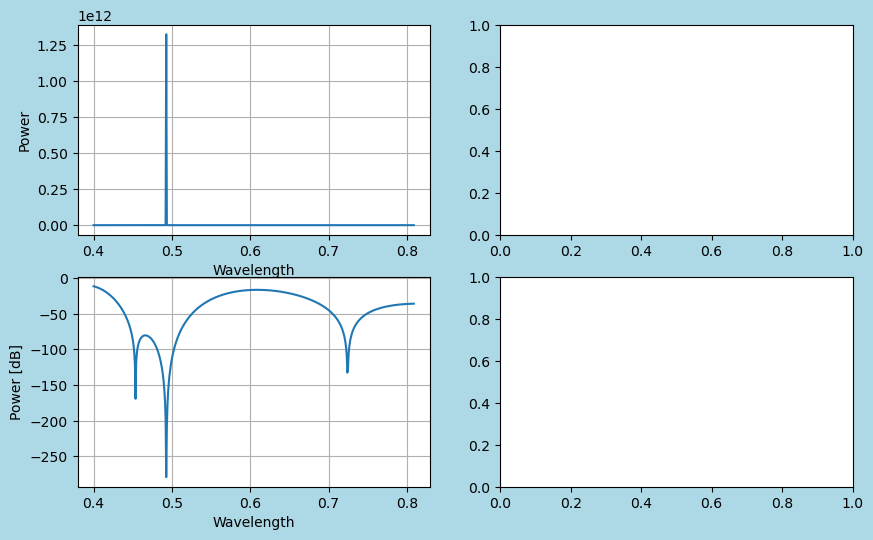

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def transfermatrix(wl, n_name, th1):
    
    #nQuartz = 1.6553 + 0.0086444/(wl.^2) + 0.00081178./(wl.^4)
    #nLN = sqrt(2.23413 + ((2.68312-wl.^2)/(wl.^2-0.04481)) + ((2.59121.* wl)/(wl - 109.776)));
 
    #substrate: quartz
  
    match n_name:
        
        case 0:
            n_index = 1
        case 1:
            n_index = 1.463 + 0.003827/(wl**2) + 0.000/(wl**4)
        case 2:
            n_index = 2.1305 + 0.018499/(wl**2) + 0.00199850/(wl**4)

        

    sigma = 2 * np.pi * n_index * th1/wl #phase [rad]
   	
   	
    TM_intermedate = np.array([[np.cos(sigma),1j*np.sin(sigma)/n_index],
                               [1j*np.sin(sigma)/n_index,np.cos(sigma)]])

    #TM_intermedate = np.array([[1, 0],
    #                           [0,1]])

    return TM_intermedate


# thin_AR_func.m
# L -> 0;	H ->	1;
#function [wlcol,dBTcol,dBRcol] = ...
#   thin_AR_func(startwl,stepwl,centerwl,mm,layer,thkpara); 
#global c;

startwl = 0.4 # [um]
stepwl = 0.0008 # [um]

mm = 512 # number of sampling point

layer1 = np.array([0, 1, 2, 1])

#thkpara = np.array([0.181924, 0.181924, 0.181924, 0.181924])
thkpara = np.array([0.25, 0.25, 0.25, 0.25])

num_layers = len(layer1)
print('Length of L1 = ')
print(num_layers)

wlcol= np.zeros(mm)
P1col=np.zeros(mm)
P2col=np.zeros(mm)
P1dBcol=np.zeros(mm)
P2dBcol=np.zeros(mm)
 

for ii in range(mm):   

    wl = startwl + stepwl *ii
    wlcol[ii] = wl

    
    n0 = 1
    ns = 1.463 + 0.003827/(wl**2) + 0.000/(wl**4)

    for kk in range(num_layers):

        match kk:
            case 0:
                M_intermediate1 = np.eye(2)

        n_name = layer1[kk]
        thickness1 = thkpara[kk]

        M_kk = transfermatrix(wl, n_name, thickness1)   

        M_inermediate2 = M_intermediate1 * M_kk
        M_intermediate1 = M_inermediate2
        #inner loop ended
    
    M_total = M_intermediate1
    
    #M_total = np.linalg.matrix_power(M_kk, num_layers)

    #print(TMout)
    #print("")

    detTMout = np.linalg.det(M_total)
    #print("det = ", detTMout)

    m11 = M_total[0,0]
    m12 = M_total[0,1]
    m21 = M_total[1,0]
    m22 = M_total[1,1]

    #t = 2 * n0 / (M_total[0, 0] * n0 + M_total[0, 1] * ns + M_total[1, 0] * n0 + M_total[1, 1] * ns)
    t = (2*n0) / ((m11 + m12*ns)*n0 + (m21 + m22*ns))

    #t = (2*n0) / ((m11 + m12*ns)*n0 + (m21 + m22*ns)) 
    #T = np.abs(t)**2
    T = t*np.conj(t) * (ns/n0)

    #s12 = 1/m22

    #P1 = np.abs(s12)**2
    P1 = T
    
    P1col[ii] = P1
 

    P1dBcol[ii] = -10*np.log(P1)
 
    
    #P1_Phase = np.angle(Eout3_x)
    #P1_phasecol[ii] = P1_Phase

    #outer loop ended


fig = plt.figure(figsize = (10,6), facecolor='lightblue')
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)


ax1.plot(wlcol,P1col)
ax1.set_xlabel("Wavelength")
ax1.set_ylabel("Power")
ax1.grid()
#ax1.set_ylim(0,1)



ax3.plot(wlcol,P1dBcol)
ax3.grid()
ax3.set_xlabel("Wavelength")
ax3.set_ylabel("Power [dB]")
#ax2.set_ylim(0,1)

plt.show()